In [1]:
import os

# Change the current working directory
os.chdir(r"C:\Users\alfat\Downloads\CSSci Semester 4\code\CSSci Semester 4 datasets\2.START_Data_GTD\GTD")

In [2]:
import pandas as pd

# load the global terrorism dataset
df = pd.read_excel('globalterrorismdb_0522dist.xlsx')

In [3]:
df = df.dropna(subset='nkill')

In [4]:
df['letal'] = df['nkill'].apply(lambda x:1 if x !=0 else 0)

In [5]:
rqmask = df['country_txt'] == 'Iraq'
smmask = df['country_txt'] == 'Somalia'
symask = df['country_txt'] == 'Syria'
yemask = df['country_txt'] == 'Yemen'

# Combine the masks with an 'or' condition
mask_to_drop = rqmask | smmask | symask | yemask

# Use the negation of the combined mask to keep rows where the mask is False
df = df[~mask_to_drop]

In [9]:
df=df[df['iyear']>=2000]

In [10]:
df

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related,letal
69833,200001010001,2000,1,1,NaN,0,NaT,139,Namibia,11,...,“Namibia: UNITA Rebels Reportedly Abduct 20 Vi...,“Namibia: 4 Injured in Shootout; UNITA 'Bandit...,“Abducted Namibians Reportedly Still Held by U...,CETIS,1,1,0,1,"200001010001, 200001010002",0
69834,200001010002,2000,1,1,NaN,1,NaT,139,Namibia,11,...,“Namibia: UNITA Rebels Reportedly Abduct 20 Vi...,“Namibia: 4 Injured in Shootout; UNITA 'Bandit...,“Abducted Namibians Reportedly Still Held by U...,CETIS,1,1,0,1,"200001010001, 200001010002",0
69835,200001010003,2000,1,1,NaN,0,NaT,92,India,6,...,“Lashkar 'Suicide' Squad Attacks Army Camp in ...,NaN,NaN,CETIS,1,1,0,1,NaN,1
69836,200001010004,2000,1,1,NaN,0,NaT,1003,Kosovo,9,...,"“Kosovo: Romany Home Attacked, 1 Person Injure...",NaN,NaN,CETIS,-9,-9,1,1,NaN,0
69839,200001010007,2000,1,1,NaN,0,NaT,92,India,6,...,“India: ULFA Militants Blow Up Oil Pipeline in...,NaN,NaN,CETIS,0,0,0,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209698,202012310012,2020,12,31,NaN,1,NaT,229,Democratic Republic of the Congo,11,...,"""At least 25 farmers ‘killed by ADF rebels’ in...","""26 civilians killed by rebels in eastern Cong...","""At least 25 killed in east DR Congo, ADF mili...",START Primary Collection,0,1,0,1,NaN,1
209700,202012310014,2020,12,31,NaN,0,NaT,141,Nepal,6,...,"""Govt vehicle torched in Jajarkot,"" Khabar Hub...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN,0
209703,202012310017,2020,12,31,NaN,0,NaT,75,Germany,8,...,"""Far-left arson attack suspected on German asy...","""Fire of Bundeswehr vehicles in Leipzig, proba...","""Anarchist Antifa Take Credit for Arson Attack...",START Primary Collection,-9,-9,0,-9,NaN,0
209704,202012310018,2020,12,31,NaN,0,NaT,4,Afghanistan,6,...,"""Civil society activist and tribal elder kille...","""Terrorism Digest: 1-2 Jan 21,"" BBC Monitoring...",NaN,START Primary Collection,-9,-9,0,-9,NaN,1


In [11]:
letal_counts = df['letal'].value_counts()
print(letal_counts)

0    48594
1    46532
Name: letal, dtype: int64


In [13]:
nkill_counts = df['nkill'].value_counts()
print(nkill_counts)

0.0      48594
1.0      20194
2.0       8069
3.0       4524
4.0       2918
         ...  
122.0        1
180.0        1
158.0        1
117.0        1
222.0        1
Name: nkill, Length: 162, dtype: int64


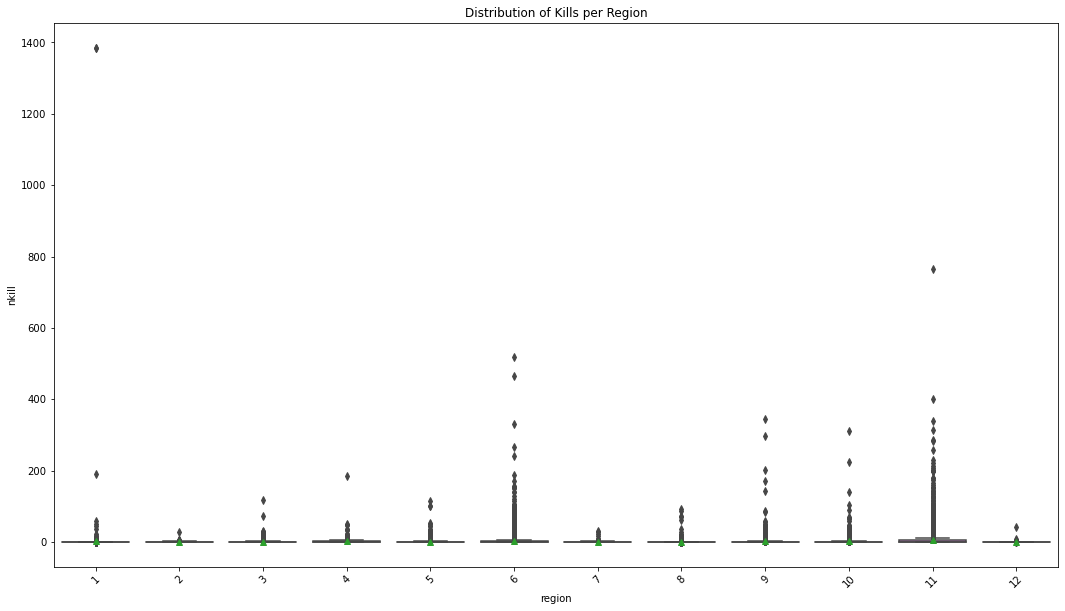

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(18, 10)) 
sns.boxplot(x='region', y='nkill', showmeans=True, data=df)
plt.xticks(rotation=45) # Rotate x-axis labels if needed
plt.title('Distribution of Kills per Region')
plt.show()

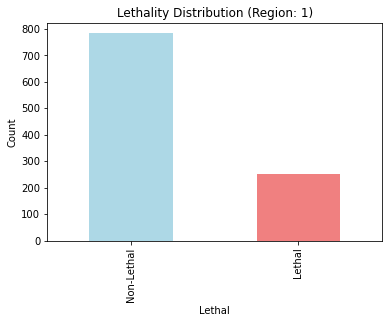

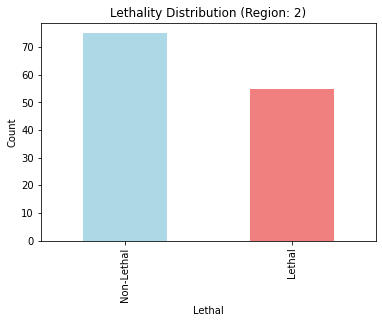

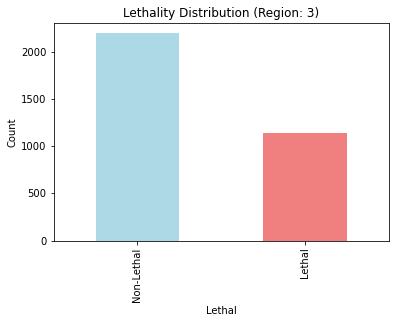

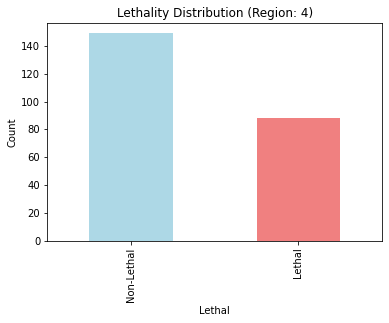

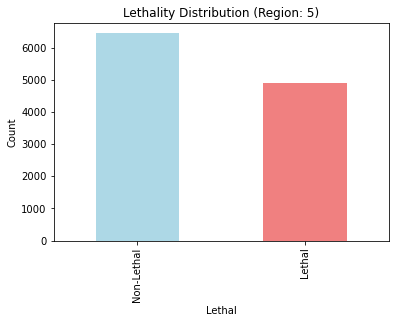

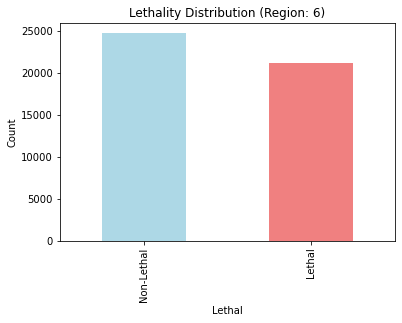

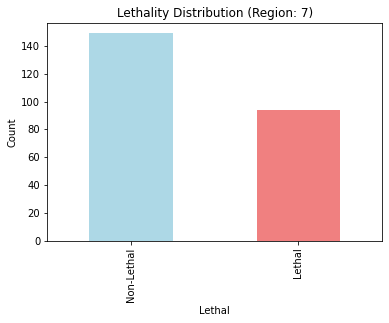

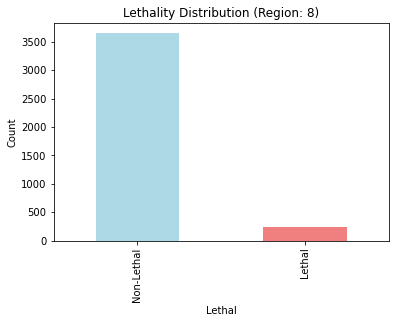

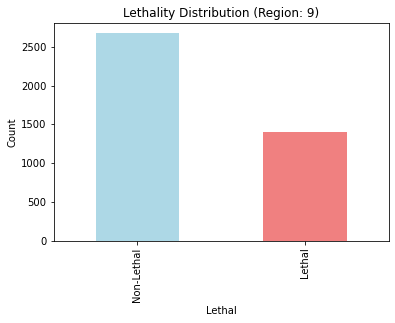

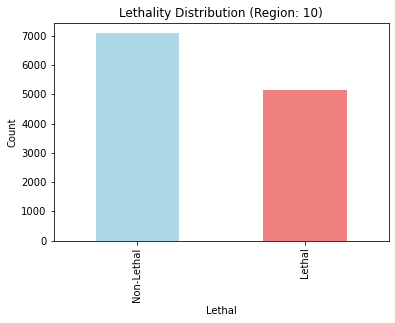

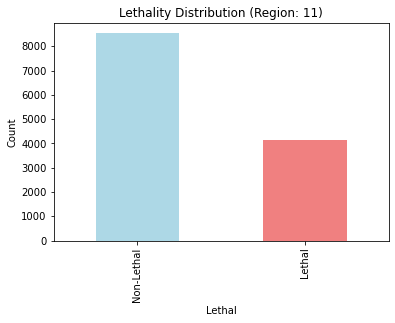

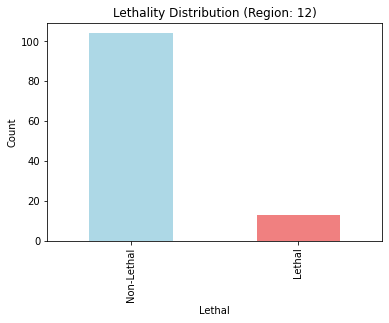

In [17]:
import matplotlib.pyplot as plt

# Bar charts for lethality per region
for region in range(1, 13):  
    region_df = df.loc[df['region'] == region]
    lethal_counts = region_df['letal'].value_counts()

    plt.figure()
    lethal_counts.plot(kind='bar', color=['lightblue', 'lightcoral'])
    plt.title(f'Lethality Distribution (Region: {region})')
    plt.xlabel('Lethal')
    plt.ylabel('Count')
    plt.xticks([0, 1], ['Non-Lethal', 'Lethal'])
    plt.show()


region 1 - North America

region 2 - Central America & Carribean

region 3 - South America

region 4 - East Asia

region 5 - Southeast Asia

region 6 - South Asia

region 7 - Central Asia

region 8 - Western Europe

region 9 - Eastern Europe

region 10 - Middle East & North Africa

region 11 - Sub-saharan Africa

region 12 - Australiasia & Oceania